<a href="https://colab.research.google.com/github/aschelin/Covid19Mobility/blob/main/covid19_mobility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Importing packages:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from pylab import rcParams
import math
import scipy.stats as st
import statistics
from statsmodels.tsa.stattools import adfuller
import statsmodels as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading and cleaning data:

---



In [2]:
# Load Brazil's Mobility data: 
df = pd.read_csv('https://raw.githubusercontent.com/ActiveConclusion/COVID19_mobility/master/google_reports/mobility_report_brazil.csv').set_index('date')


In [3]:
df.index = pd.to_datetime(df.index)


In [4]:
df['sub region 1'].unique()

array(['Total', 'Federal District', 'State of Acre', 'State of Alagoas',
       'State of Amapá', 'State of Amazonas', 'State of Bahia',
       'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
       'State of Maranhão', 'State of Mato Grosso',
       'State of Mato Grosso do Sul', 'State of Minas Gerais',
       'State of Pará', 'State of Paraíba', 'State of Paraná',
       'State of Pernambuco', 'State of Piauí', 'State of Rio de Janeiro',
       'State of Rio Grande do Norte', 'State of Rio Grande do Sul',
       'State of Rondônia', 'State of Roraima', 'State of Santa Catarina',
       'State of São Paulo', 'State of Sergipe', 'State of Tocantins'],
      dtype=object)

In [5]:
df_gdf = df[df['sub region 1']=='Federal District']

In [6]:
df_gdf.size

5112

In [7]:
df_gdf.columns

Index(['country', 'sub region 1', 'sub region 2', 'retail and recreation',
       'grocery and pharmacy', 'parks', 'transit stations', 'workplaces',
       'residential'],
      dtype='object')

## Making graphics:

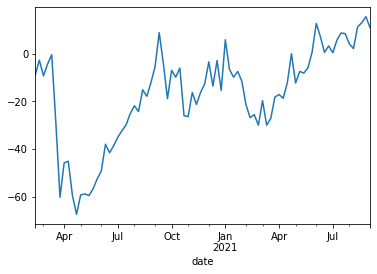

In [8]:
df_gdf['parks'].resample('W').mean().plot();

In [9]:
df_gfd_corr = df_gdf[['retail and recreation',
       'grocery and pharmacy', 'parks', 'transit stations', 'workplaces',
       'residential']]

In [10]:
dfcorr = df_gfd_corr.corr()

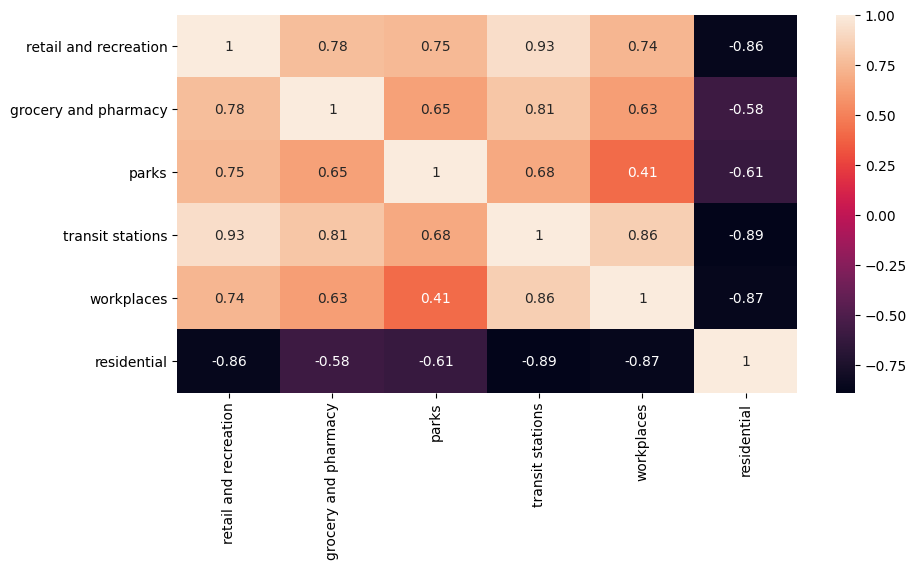

In [11]:
fig, (ax2) = plt.subplots(1,figsize=(10,5),dpi=100)
cmap = sb.diverging_palette(230, 20, as_cmap=True)

sb.heatmap(dfcorr,annot=True);

## Loading and cleaning data from Covid19 in the GDF/ Brazil




In [12]:
df_covid = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv').set_index('date')


In [13]:
df_covid.tail(5)

,epi_week,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
date,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-08,136,Brazil,SC,TOTAL,22,18853,680,1164514,18853,1164514,263.13409,16253.29319,0.01619,1132524.0,189692.0,2320266.0,32384.29385,4874769.0,68.03787,2170175.0,30.28945,237323.0,3.31235,NaN,NaN
2021-09-08,136,Brazil,SE,TOTAL,0,6001,11,277600,6001,277600,261.06105,12076.41202,0.02162,269006.0,445.0,593883.0,25835.64769,1436753.0,62.50296,565854.0,24.61630,39952.0,1.73803,NaN,NaN
2021-09-08,136,Brazil,SP,TOTAL,15,146610,2080,4297229,146610,4297229,319.27926,9358.27090,0.03412,4055982.0,1137203.0,14183490.0,30888.03080,34973009.0,76.16231,18341677.0,39.94350,1148662.0,2.50149,20635.0,0.04494
2021-09-08,136,Brazil,TO,TOTAL,0,3706,0,220372,3706,220372,235.62083,14010.85661,0.01682,210048.0,359.0,660181.0,41973.12422,857047.0,54.48951,353166.0,22.45366,30082.0,1.91256,NaN,NaN
2021-09-08,136,Brazil,TOTAL,TOTAL,239,584678,14008,20932341,584421,20928008,274.08798,9812.75674,0.02793,19295628.0,7958935.0,57198050.0,26813.55854,136137280.0,63.81904,64449925.0,30.21313,4683394.0,2.19550,25446.0,0.01193


In [14]:
max_date = max(df_gdf.index)
min_date = min(df_covid.index)

In [15]:
max(df_covid.index)

'2021-09-08'

In [16]:
df_covid.columns

Index(['epi_week', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')

In [17]:
df_covid.index = pd.to_datetime(df_covid.index)


In [18]:
df_covid_gdf= df_covid[df_covid.state == 'DF']

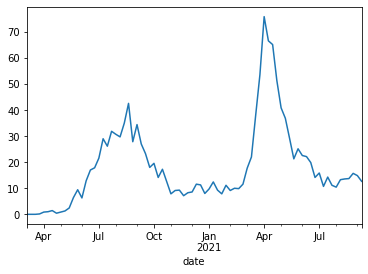

In [19]:
df_covid_gdf.newDeaths.resample('W').mean().plot()

In [20]:
df_geral = df_gdf[min_date:max_date]

In [21]:
df_gdf.shape

(568, 9)

In [22]:
df_covid_gdf[min_date:max_date].shape

(547, 25)

In [23]:
df_geral[~df_geral.index.isin(df_covid_gdf.index)].index


DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06'],
              dtype='datetime64[ns]', name='date', freq=None)

In [24]:
df_geral = df_gdf['2020-03-07':max_date]

In [25]:
df_geral1 = pd.merge(df_geral, df_covid_gdf, left_index=True, right_index=True)


In [26]:
df_geral1.sample(10)

,country_x,sub region 1,sub region 2,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,epi_week,country_y,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-11,Brazil,Federal District,Total,-54.0,0.0,-50.0,-46.0,-38.0,16.0,15,Brazil,DF,TOTAL,0,14,36,592,14,579,0.46430,19.63341,0.02365,148.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-27,Brazil,Federal District,Total,-28.0,16.0,-8.0,-7.0,9.0,7.0,40,Brazil,DF,TOTAL,5,3188,905,189513,3188,189513,105.72858,6285.11297,0.01682,177073.0,12634.0,525284.0,17420.80638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-04,Brazil,Federal District,Total,-45.0,8.0,-43.0,-33.0,-32.0,19.0,23,Brazil,DF,TOTAL,5,196,903,12923,196,12923,6.50025,428.58545,0.01517,6916.0,3112.0,147226.0,4882.68373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,Brazil,Federal District,Total,-22.0,14.0,-14.0,-11.0,-14.0,8.0,105,Brazil,DF,TOTAL,10,4564,797,277907,4564,277907,151.36300,9216.66001,0.01642,267720.0,41.0,782118.0,25938.58987,59671.0,1.97896,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-28,Brazil,Federal District,Total,-70.0,-30.0,-66.0,-59.0,-45.0,23.0,13,Brazil,DF,TOTAL,0,0,19,260,0,260,0.00000,8.62278,0.00000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-22,Brazil,Federal District,Total,-60.0,-12.0,-70.0,-46.0,-44.0,21.0,17,Brazil,DF,TOTAL,1,25,46,959,25,946,0.82911,31.80480,0.02607,523.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-15,Brazil,Federal District,Total,-8.0,13.0,-9.0,-5.0,-1.0,3.0,12,Brazil,DF,TOTAL,0,0,6,14,0,8,0.00000,0.46430,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,Brazil,Federal District,Total,-26.0,58.0,23.0,-24.0,-39.0,9.0,53,Brazil,DF,TOTAL,11,4259,566,251701,4259,251701,141.24781,8347.54987,0.01692,241413.0,NaN,771909.0,25600.01300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-24,Brazil,Federal District,Total,-22.0,15.0,-10.0,-5.0,8.0,5.0,104,Brazil,DF,TOTAL,8,4476,821,270171,4476,270171,148.44452,8960.09907,0.01657,259164.0,68.0,771909.0,25600.01300,15134.0,0.50191,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_corr = df_geral1[['retail and recreation',
       'grocery and pharmacy', 'parks', 'transit stations', 'workplaces',
       'residential','newCases','newDeaths']]

## Correlation between mobility and covid19 cases (without lag)

In [28]:
dfcorr = df_corr.corr()

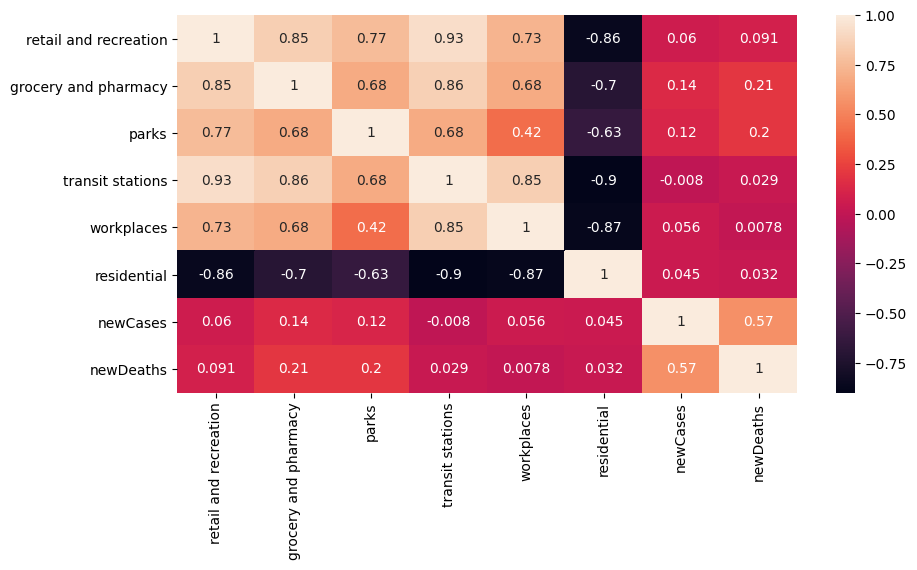

In [29]:
fig, (ax2) = plt.subplots(1,figsize=(10,5),dpi=100)
cmap = sb.diverging_palette(230, 20, as_cmap=True)

sb.heatmap(dfcorr,annot=True);

## Correlation analysis between covid19 and mobility with Lag (weeks)

In [30]:
df_new = df_corr.resample('W').mean()

In [31]:
max_lag=30
lagged_correlation = pd.DataFrame.from_dict(
    {x: [df_new['newCases'].corr(df_new[x].shift(-t)) for t in range(max_lag)] for x in df_new.columns})

A correlação máxima entre a mobilidade (do tipo *parks*) e mortes diárias por covid19 ocorre num lag de quatro a oito semanas:

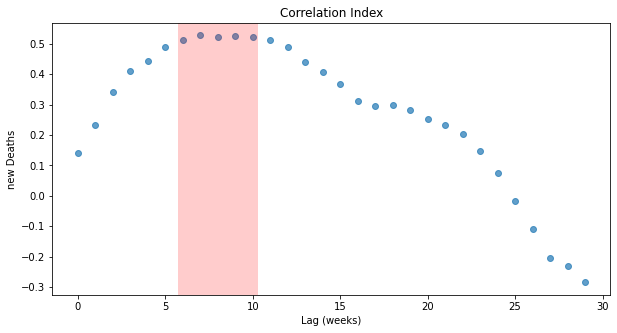

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(lagged_correlation.index,lagged_correlation['parks'],'o',alpha=0.7);
plt.xlabel('Lag (weeks)')
plt.ylabel('new Deaths')
plt.title('Correlation Index')
plt.axvline(x = 8, color = 'r',lw = 80,alpha = 0.2) 
plt.show()
